In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 110)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import zipfile
from scipy import stats
from statsmodels.stats import weightstats as stests

In [ ]:
#Unzipping the dataset
zf = zipfile.ZipFile("/content/drive/My Drive/out.zip")

#Creating the dataframe from the dataset 
DF = pd.read_csv(zf.open('out.csv'), low_memory= False)
pd.set_option("max_columns", 100)
pd.set_option("max_rows", 100)

In [ ]:
#Printing the first five rows of the dataset
DF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20190416181629,2019-04-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.96592,-43.17896,...,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$302.00,NaN,NaN,$0.00,$306.00,2,$58.00,5,30,5,5,30,30,5.0,30.0,today,t,26,41,67,342,2019-04-16,224,20,2010-07-15,2019-04-05,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1,0,0,2.10
1,25026,https://www.airbnb.com/rooms/25026,20190416181629,2019-04-16,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,NaN,NaN,https://a0.muscache.com/im/pictures/3003965/68...,NaN,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",within a day,88%,NaN,f,https://a0.muscache.com/im/pictures/9e204f80-1...,https://a0.muscache.com/im/pictures/9e204f80-1...,Copa

#Cleaning The Data
First, we choose the data columns regarded important after going over dataset

In [ ]:
df=DF[['id' ,
 'name' ,
 'host_location',
 'host_response_time',
 'host_is_superhost',
 'host_response_rate',
 'host_total_listings_count',
 'host_verifications',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'city',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'requires_license',
 'instant_bookable',
 'cancellation_policy']]

#Dropping columns with Duplicate ID's

In [ ]:
df.drop_duplicates(subset ="id",keep = False, inplace = True) 
df.head()

,id,name,host_location,host_response_time,host_is_superhost,host_response_rate,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,city,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,cancellation_policy
388,454439,GREAT HOUSE IN AN ISLAND IN RIO !,"Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,f,88%,3.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,Barra da Tijuca,Rio de Janeiro,BR,Brazil,-23.00096,-43.30893,f,House,Private room,2,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$74.00,$50.00,1,1125,5,0,93.0,f,f,strict_14_with_grace_period
633,762985,Beautiful Condo at Leblon Beach,"Brasilia, Distrito Federal, Brazil",a few days or more,f,17%,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Leblon,Rio de Janeiro,BR,Brazil,-22.98532,-43.22462,t,Apartment,Entire home/apt,6,2.0,2.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$299.00,$0.00,2,90,21,0,88.0,f,f,moderate
635,764534,Copacabana Beach / Wi-fi-Cable-AC,"Rio de Janeiro, Rio de Janeiro, Brazil",NaN,f,NaN,2.0,"['email', 'phone', 'reviews']",f,Copacabana,Rio de Janeiro,BR,Brazil,-22.96760,-43.18378,f,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$171.00,$30.00,5,26,11,0,94.0,f,f,strict_14_with_grace_period
949,925561,Rentin Room near Arpoador Beach,"Rio de Janeiro, Rio de Janeiro, Brazil",within a day,f,80%,4.0,"['email', 'phone', 'facebook']",f,Ipanema,Rio de Janeiro,BR,Brazil,-22.98355,-43.19550,f,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$322.00,$0.00,20,30,0,0,NaN,f,t,flexible
1032,978423,Condo Barão 53,"Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,f,80%,22.0,"['email', 'phone', 'reviews']",f,Copacabana,Rio de Janeiro,BR,Brazil,-22.97564,-43.19054,t,Apartment,Entire home/apt,1,NaN,1.0,1.0,Real Bed,{},$310.00,$0.00,3,30,0,0,NaN,f,f,strict_14_with_grace_period


In [ ]:
df.describe()

,id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating
count,5.403000e+03,5401.000000,5403.000000,5403.000000,5403.000000,5393.000000,5377.000000,5270.000000,5403.000000,5403.000000,5403.000000,5403.000000,1131.000000
mean,3.070160e+07,61.811887,-22.964542,-43.247970,3.982787,1.583534,1.495258,2.404934,3.685360,684.390524,1.126967,0.411068,91.833775
std,1.249516e+07,279.020811,0.037697,0.097469,2.585860,1.181044,1.268914,2.217097,16.893185,528.490311,4.698793,1.718533,15.250439
min,2.448000e+04,0.000000,-23.070930,-43.702700,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,20.000000
25%,2.197172e+07,1.000000,-22.984705,-43.303375,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,0.000000,0.000000,90.000000
50%,3.387645e+07,2.000000,-22.970690,-43.195211,4.000000,1.000000,1.000000,2.000000,2.000000,1125.000000,0.000000,0.000000,100.000000
75%,4.159155e+07,4.000000,-22.945235,-43.185042,5.000000,2.000000,2.000000,3.000000,3.000000,1125.000000,1.000000,0.000000,100.000000
max,4.322784e+07,1495.000000,-22.750760,-43.104060,24.000000,30.000000,45.000000,50.000000,700.000000,1125.000000,93.000000,39.000000,100.000000


In [ ]:
df

,id,name,host_location,host_response_time,host_is_superhost,host_response_rate,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,city,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,extra_people,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,requires_license,instant_bookable,cancellation_policy
388,454439,GREAT HOUSE IN AN ISLAND IN RIO !,"Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,f,88%,3.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,Barra da Tijuca,Rio de Janeiro,BR,Brazil,-23.00096,-43.30893,f,House,Private room,2,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$74.00,$50.00,1,1125,5,0,93.0,f,f,strict_14_with_grace_period
633,762985,Beautiful Condo at Leblon Beach,"Brasilia, Distrito Federal, Brazil",a few days or more,f,17%,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,Leblon,Rio de Janeiro,BR,Brazil,-22.98532,-43.22462,t,Apartment,Entire home/apt,6,2.0,2.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$299.00,$0.00,2,90,21,0,88.0,f,f,moderate
635,764534,Copacabana Beach / Wi-fi-Cable-AC,"Rio de Janeiro, Rio de Janeiro, Brazil",NaN,f,NaN,2.0,"['email', 'phone', 'reviews']",f,Copacabana,Rio de Janeiro,BR,Brazil,-22.96760,-43.18378,f,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$171.00,$30.00,5,26,11,0,94.0,f,f,strict_14_with_grace_period
949,925561,Rentin Room near Arpoador Beach,"Rio de Janeiro, Rio de Janeiro, Brazil",within a day,f,80%,4.0,"['email', 'phone', 'facebook']",f,Ipanema,Rio de Janeiro,BR,Brazil,-22.98355,-43.19550,f,Apartment,Private room,1,1.5,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$322.00,$0.00,20,30,0,0,NaN,f,t,flexible
1032,978423,Condo Barão 53,"Rio de Janeiro, Rio de Janeiro, Brazil",within a few hours,f,80%,22.0,"['email', 'phone', 'reviews']",f,Copacabana,Rio de Janeiro,BR,Brazil,-22.97564,-43.19054,t,Apartment,Entire home/apt,1,NaN,1.0,1.0,Real Bed,{},$310.00,$0.00,3,30,0,0,NaN,f,f,strict_14_with_grace_period
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355104,36703489,Blue pigment hotel,BR,NaN,f,NaN,0.0,"['email', 'phone']",f,Centro,Centro,BR,Brazil,-22.91140,-43.17758,f,House,Private room,3,2.0,3.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",$213.00,$0.00,1,6,0,0,NaN,f,t,strict_14_with_grace_period
355105,36704066,The new binkai hotel,BR,NaN,f,NaN,0.0,"['email', 'phone']",f,Copacabana,Copacabana,BR,Brazil,-22.97087,-43.18777,f,House,Private room,3,2.0,3.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",$94.00,$0.00,1,5,0,0,NaN,f,t,strict_14_with_grace_period
355106,36705469,Wodehous hotel,BR,NaN,f,NaN,1.0,"['email', 'phone']",f,Ipanema,Ipanema,BR,Brazil,-22.98313,-43.20928,f,House,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,""Free parking...",$172.00,$0.00,1,8,0,0,NaN,f,t,flexible
355112,36724883,Apartamento quarto e sala para temporada em copa,BR,NaN,f,NaN,2.0,['phone'],f,Copacabana,Copacabana,BR,Brazil,-22.96424,-43.17648,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{Kitchen,Elevator,Essentials,""Hot water""}",$139.00,$0.00,2,1125,0,0,NaN,f,t,flexible


## Dropping Null Columns

In [ ]:
#Dropping Random columns
df.isnull().sum()

id                              0
name                            2
host_location                  25
host_response_time           1156
host_is_superhost               2
host_response_rate           1156
host_total_listings_count       2
host_verifications              0
host_identity_verified          2
neighbourhood_cleansed          0
city                           36
country_code                    0
country                         0
latitude                        0
longitude                       0
is_location_exact               0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                      10
bedrooms                       26
beds                          133
bed_type                        0
amenities                       0
price                           0
extra_people                    0
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
number_of_revi

#Converting Price and Response Rate from String to Float
This step is important as most of our analysis revolves around Price, and it would be easier if it were a float. Same for Response

In [ ]:
df['host_response_rate'] = (df.host_response_rate.str.replace('%','') # replace dollars with nothing
                                  .str.replace(',','_') # swap , for _
                                  .replace('', pd.np.nan) # an empty string is missing data
                                  .astype(float))
df['price'] = (df.price.str.replace('$','') # replace dollars with nothing
                                  .str.replace(',','_') # swap , for _
                                  .replace('', pd.np.nan) # an empty string is missing data
                                  .astype(float)) # and cast to a float

In [ ]:
df.dropna(subset=['city'],inplace=True)
df.dropna(subset=['host_location'],inplace=True)
df['host_response_rate'].fillna(df['host_response_rate'].mean())
df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

388       93.000000
633       88.000000
635       94.000000
949       91.850799
1032      91.850799
            ...    
355104    91.850799
355105    91.850799
355106    91.850799
355112    91.850799
355125    91.850799
Name: review_scores_rating, Length: 5342, dtype: float64

#Histogram of Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c32db2fd0>,
      dtype=object)

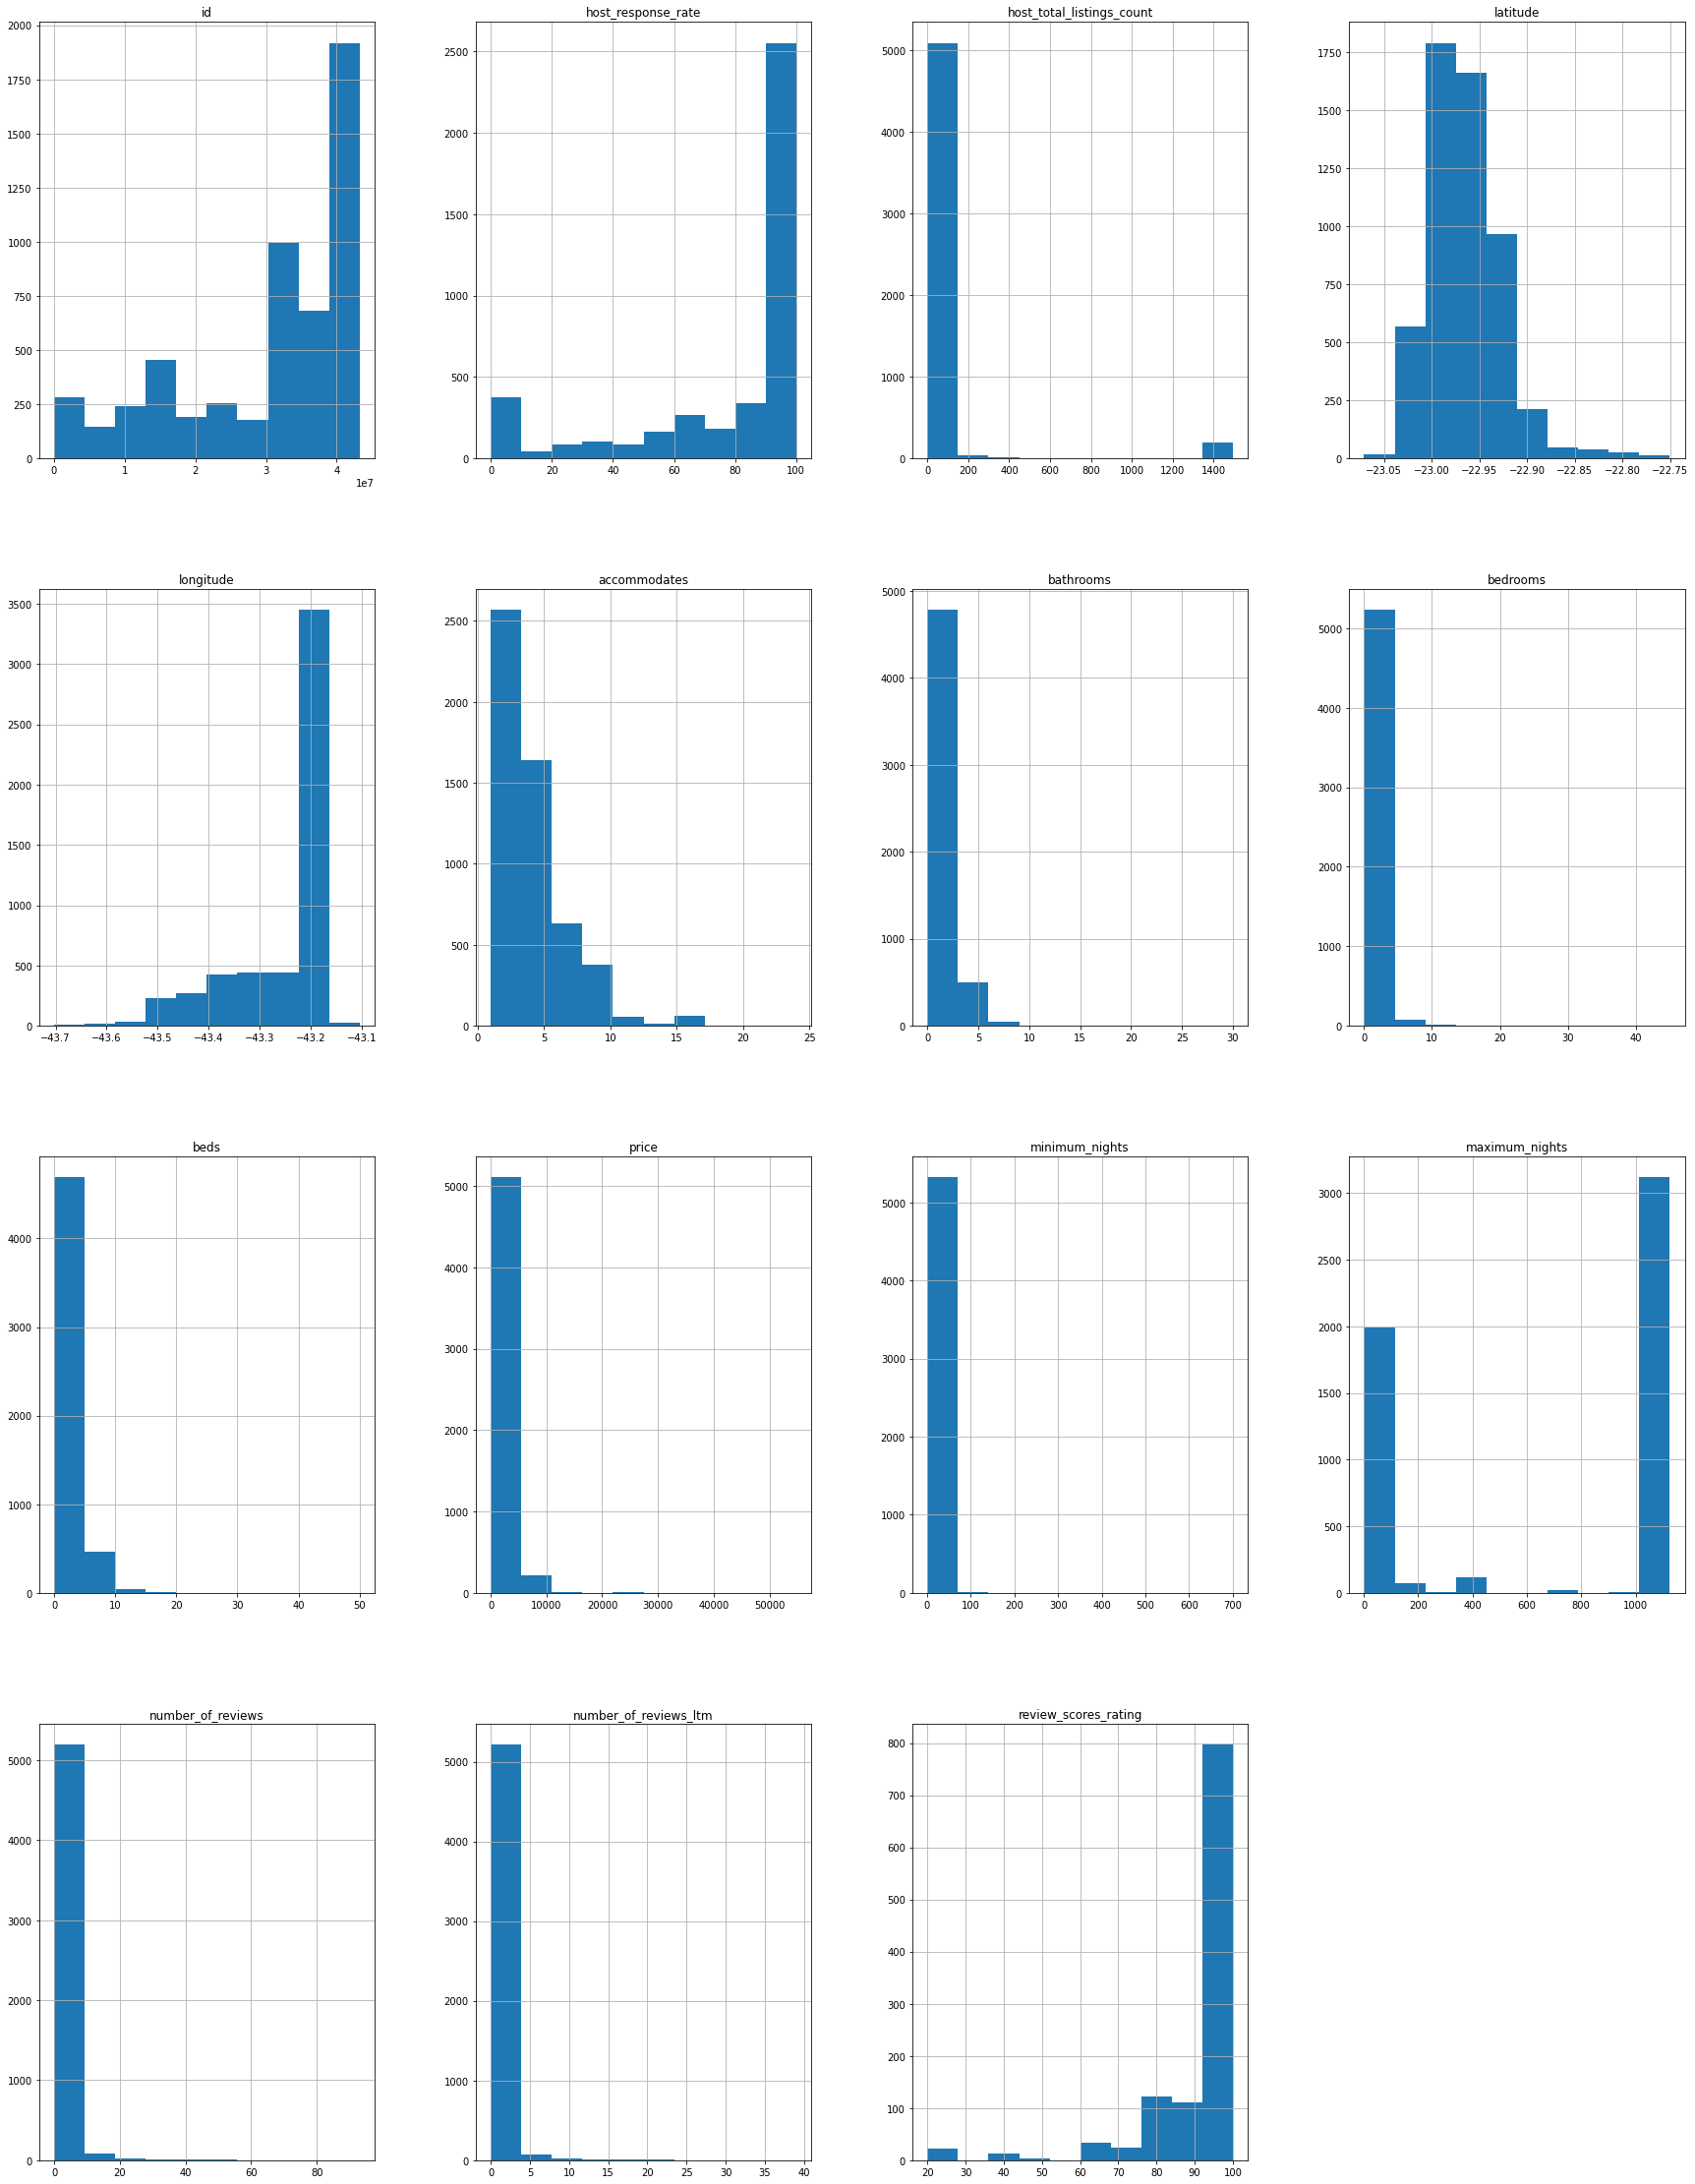

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (30,40))
ax = fig.gca()
df.hist(ax = ax)

#Correlation HeatMap

This will allow us to get a good idea of attributes strongly and weakly correlated, thus giving us an idea about what analysis to perform

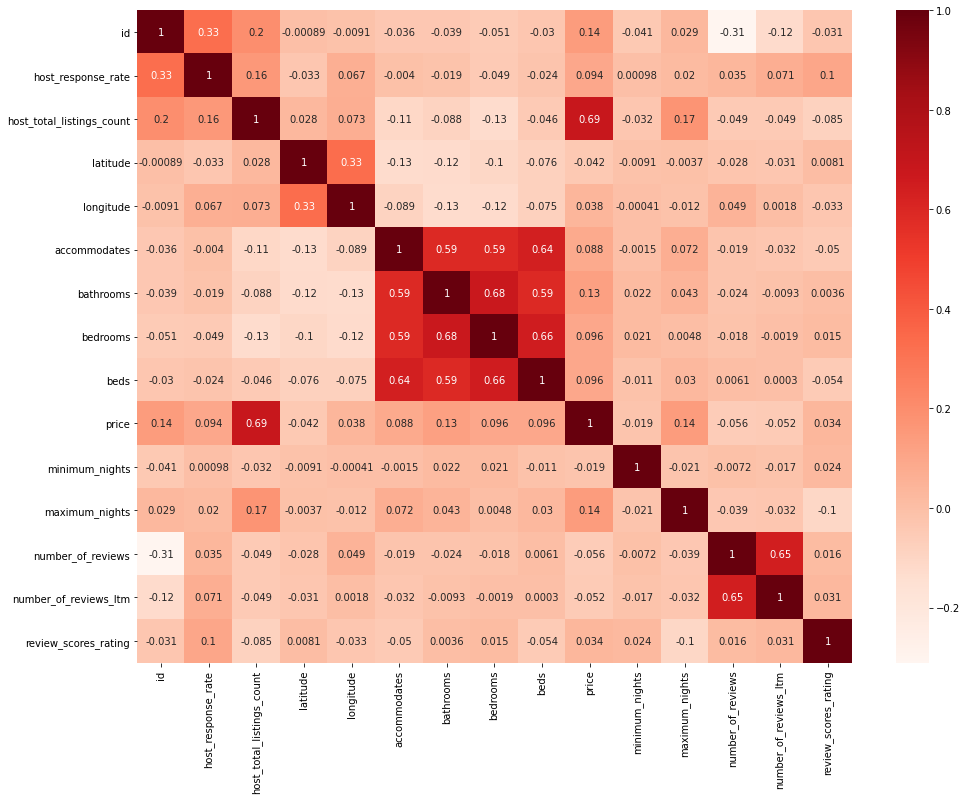

In [ ]:
plt.figure(figsize=(16,12))
_=sns.heatmap(df.corr(),cmap ='Reds', annot = True)

# NOTE:
We see that host-listings having a negative correlation with price,
already indicating that people with lesser listings charge more than people with higher listings.

# Dealing with outliers
To better deal with outliers than simply remove it by intuition, we'll use the descriptive statistic method interquartile range.
First, define a function to get the max_fence_value, which is defined as the highest value a variable can have so that it is not considered an outlier.

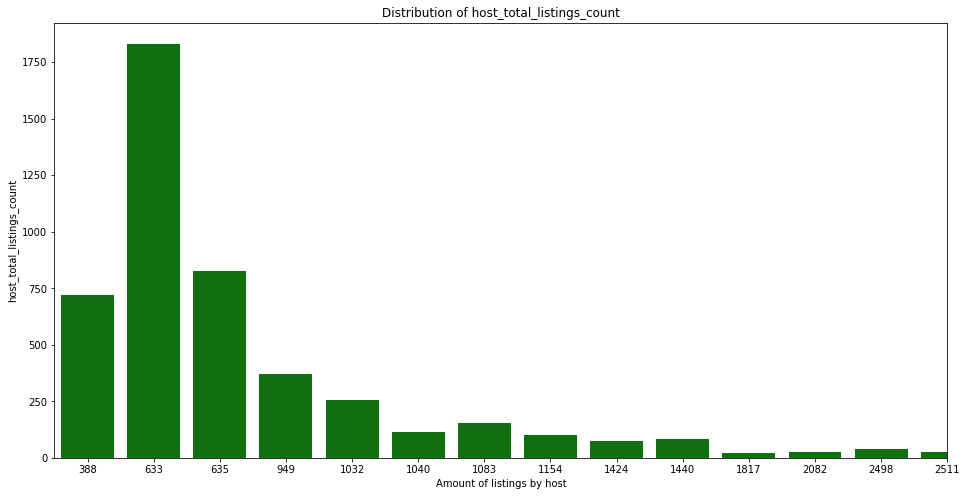

In [ ]:
def get_max_fence(column):
    qt = df[column].quantile([0.25,0.75])
    upper = qt.values[1]
    iqr = upper-qt.values[0]
    max_fence = upper + 1.5*(iqr)
    return max_fence

#function to visualise the interquartile range
def box_plot(column):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(16,6)
    _ = sns.boxplot(x=df[column], ax = ax1)
    ax1.set_title(f'{column} boxplot')
    ax2.set_title(f'Zooming in the {column} boxplot')
    ax2.set_xlim((-0.1,1.1*get_max_fence(column)))
    _ = sns.boxplot(x=df[column], ax = ax2)

#Distribution of Host Listing Count
column = 'host_total_listings_count'
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts(), color='g')
ax.set_xticklabels(map(int,df['beds'].index))
ax.set_xlim((-0.5,get_max_fence(column)+2))
ax.set_xlabel('Amount of listings by host')
_ = ax.set_title('Distribution of host_total_listings_count')

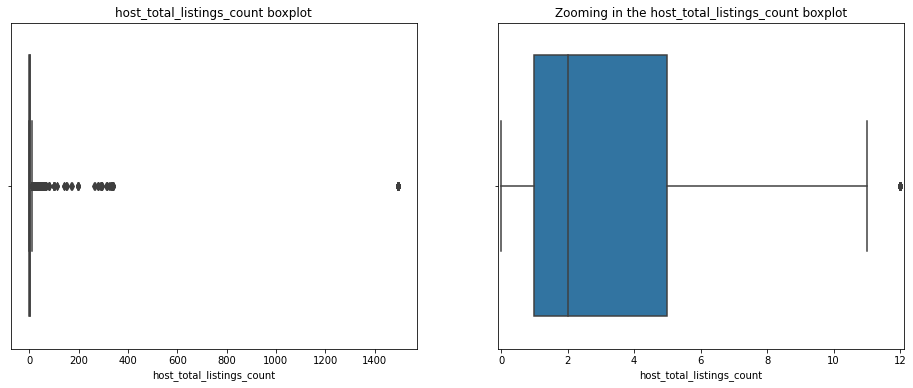

In [ ]:
box_plot(column)

In [ ]:
print(get_max_fence(column))
rows_before =df.shape[0]
df = df[df['host_total_listings_count'] <= get_max_fence('host_total_listings_count')]
print(f'{rows_before-df.shape[0]} rows were deleted.')

11.0
764 rows were deleted.


This boxplot also shows us that there is some zero values. These values will be changed to 1, since if the hosts didn't have any listing, they wouldn't be on the dataset in the first place.

In [ ]:
df.loc[df['host_total_listings_count'] == 0.0, 'host_total_listings_count'] = 1.0

#  Analysing Price

In [ ]:
box_plot('price')
get_max_fence('price')

In [ ]:
rows_before = df.shape[0]
df = df[df['price'] <= get_max_fence('price')]
print(f'{rows_before-df.shape[0]} rows were removed')

plt.figure(figsize=(12,8))
ax = sns.distplot(df['price'],norm_hist=True)
_ = ax.set_title('Price distribution - Outliers removed')


Some listings contains a price with value zero, which is, clearly, a mistake. This values are dropped from the dataset since there are few of them.

In [ ]:
df.loc[df['price'] <= 0, 'price']
df.drop(df.loc[df['price'] <= 0].index, axis = 0, inplace = True)

Since price is not well distributed, a binning technique will be applied in order to better analyze data. The values below were in order to keep similar distributions between classes:

0: [0, 100]
1: (100,150]
2: (150, 200]
3: (200, 250]
4: (250, 300]
5: (300, 400]
6: (400, 600]
7: (600, 1000]
8: (1000, 100000] 

In [ ]:
bins_price = [0, 100, 150, 200, 250, 300, 400, 600, 1000, 100000] 
price_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]

df['price_bins'] = pd.cut(df['price'], bins_price, labels = price_labels, include_lowest = True)
df['price_bins'] = df['price_bins'].astype(int)
df['price_bins'].hist(bins = 30);



# Price VS Location
Analyzing different values for host_neighbourhood

In [ ]:
len(df['neighbourhood_cleansed'].value_counts())


In order to analyze price for different neibourhoods, the column price_bins was used instead of the price column, since its well distributed between each class, therefore the mean will be less sensitive to outliers.

In [ ]:
df.groupby('neighbourhood_cleansed').agg({'price_bins': 'mean'}).sort_values(by = 'price_bins')

In [ ]:
px.set_mapbox_access_token('pk.eyJ1IjoiaGFyc2h1YmgiLCJhIjoiY2toMDZ3ODRxMHY1ZDJxbnZqdmJjeTExYSJ9.8ucXhwpGCNvvDWrN2yj9yw')
fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color='price_bins', size_max=20, zoom=9)
fig.show()

In [ ]:
sns.pairplot(df)

# Hypothesis Tests

In [ ]:
plt.scatter(df["review_scores_rating"],df["number_of_reviews"])
#NULL HYPOTHESIS: CO-EFFICENT OF REGRESSION IS 0
#ALTERNATE: != 0
#TWO-TAILED TEST AS != 

Here we see that these two attributes are left-skewed T distributions

In [ ]:
from scipy.stats import ttest_ind
host=df['review_scores_rating']
print("review_scores_rating mean value:",df.price.mean())
print("review_scores_rating S.D value:",df.price.std())
sco=df['number_of_reviews']
print("number_of_reviews mean value:",df.number_of_reviews.mean())
print("number_of_reviews S.D value:",df.number_of_reviews.std())
ttest ,pval = ttest_ind(df["review_scores_rating"],df["number_of_reviews"])

print("p-value",float(pval))
if pval <0.05:   # alpha value is 0.05 or 5%
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

Since NULL is rejected,there is a relation between Price and Number of Reviews